In [4]:
import wapordl
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

bb = [30.0, 28.5, 31.5, 30.5]
folder = "/Users/hmcoerver/Local/wapordl_test"
variable = "L2-AETI-D"
period = ["2018-01-01", "2018-12-31"]

In [5]:
# Download data
fp_a_nc = wapordl.wapor_map(bb, "L2-AETI-A", period, folder, extension = ".nc")
fp_d_nc = wapordl.wapor_map(bb, "L2-AETI-D", period, folder, extension = ".nc")

Found 1 files for L2-AETI-A between 2018-01-01 00:00:00 and 2018-12-31 00:00:00.


Found 36 files for L2-AETI-D between 2018-01-01 00:00:00 and 2018-12-31 00:00:00.


In [6]:
# Open dekadal data
ds_d = xr.open_dataset(fp_d_nc, decode_coords = "all")

# Determine date for each band.
coords = [np.datetime64(da.attrs["valid_time"], "ns") for da in ds_d.data_vars.values()]

# Make 3D array (time, y, x).
da_d = ds_d.to_array("time").assign_coords({"time": coords})

# Multiply values with dekad length.
length = xr.where(da_d["time"].dt.day != 21, 10, da_d["time"].dt.daysinmonth - 20)
da_d = (da_d * length).sum(dim = "time")


In [7]:
# Open annual data.
ds_a = xr.open_dataset(fp_a_nc, decode_coords = "all")
da_a = ds_a["Band1"]

Text(0.5, 1.0, 'annual')

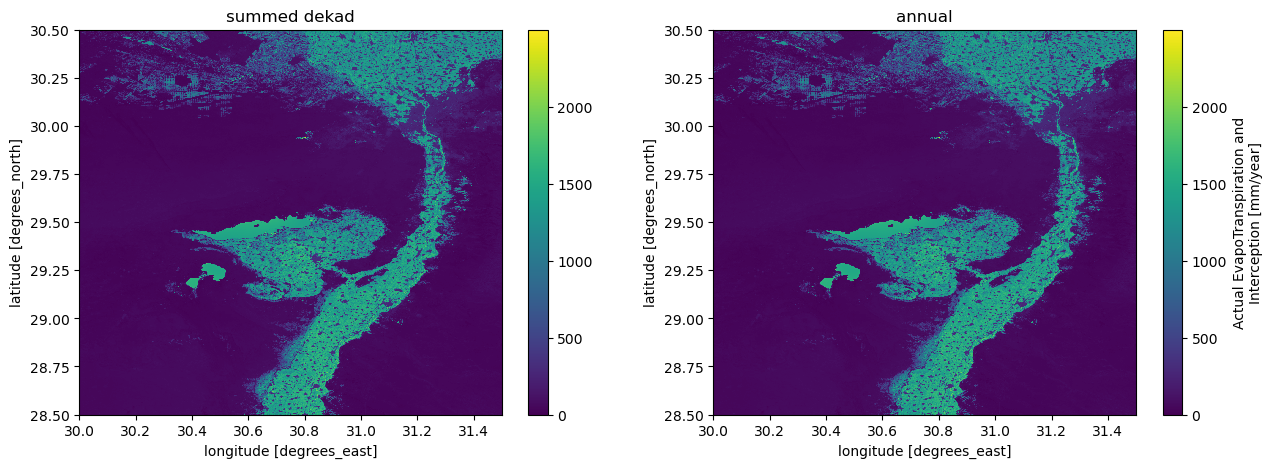

In [8]:
# Make a plot
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
da_d.plot(ax = axs[0])
axs[0].set_title("summed dekad")
da_a.plot(ax = axs[1])
axs[1].set_title("annual")